In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import fitsio
from Correlator import Correlator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


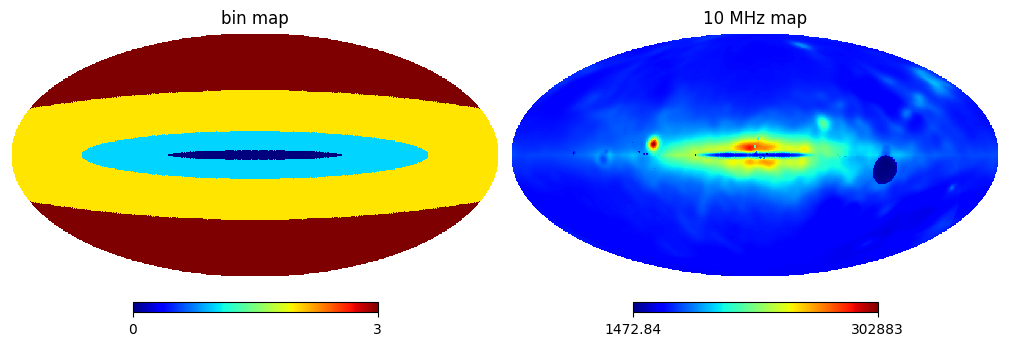

In [52]:
a=Correlator('../../Drive/Simulations/SkyModels/ULSA_maps/200.fits',0, 0, el_param=[500,80,40], r_param=[0.05,0.25,0.7])
plt.figure(figsize=(10,5))
hp.mollview(a.binmap, sub=(1,2,1), title='bin map', cmap='jet')
hp.mollview(a.map[20,:], sub=(1,2,2), title='10 MHz map', cmap='jet')

In [54]:
a.map.max()

np.float64(2240700400.3693094)

In [29]:
xi, c= a.get_correlations()

  4%|▍         | 215/4910 [00:03<01:16, 61.30it/s]


KeyboardInterrupt: 

In [5]:
xi, c= a.get_correlations_jax()

XlaRuntimeError: INVALID_ARGUMENT: Unexpected PJRT_ExecuteOptions size: expected 88, got 80. The plugin is likely built with a later version than the framework. This plugin is built with PJRT API version 0.76.